In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [23]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
test_images=test_images/255.0
train_images=train_images/255.0

In [24]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [26]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense (10, activation='softmax')
  ])

In [31]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1948 - accuracy: 0.9271
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1888 - accuracy: 0.9294
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1848 - accuracy: 0.9309
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1795 - accuracy: 0.9326
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1752 - accuracy: 0.9340
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1695 - accuracy: 0.9362
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1683 - accuracy: 0.9364
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1612 - accuracy: 0.9399
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1598 - accuracy: 0.9397
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.155

In [32]:
test_loss, test_acc = model.evaluate (test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.3174 - accuracy: 0.8914
Test accuracy: 0.8913999795913696


Pick a number: 78
1/1 [==============================] - 0s 26ms/step


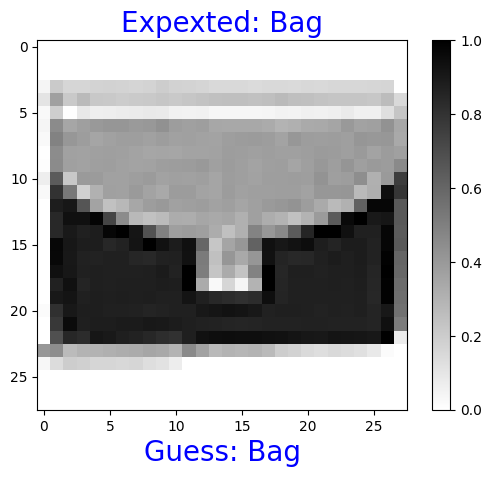

In [72]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top','Trouser','Pullover',
                 'Dress','Coat','Sandal','Shirt',
                 'Sneaker','Bag','Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  show_image(image,class_names[correct_label],predicted_class)

def show_image(img,label,guess):
  plt.figure()
  plt.imshow(img,cmap=plt.cm.binary)
  plt.title(label="Expexted: "+label,fontsize=20,color="blue")
  plt.xlabel(xlabel="Guess: "+guess,fontsize=20,color="blue")
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model,image,label)